# importing the Dataset



In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [3]:
messages.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<AxesSubplot:xlabel='label', ylabel='count'>

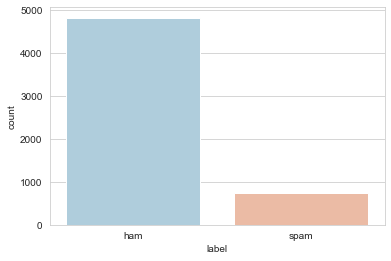

In [4]:
import seaborn as sb
sb.set_style('whitegrid')
sb.countplot(x='label',data=messages,palette='RdBu_r')

# Data cleaning and preprocessing

In [5]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\splpt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [7]:
ps = PorterStemmer()
corpus = []

In [8]:
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words mode

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [11]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [12]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

# Train Test Split


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier


In [14]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [15]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.9847533632286996
ROC Area under Curve = 0.946875
Time taken = 0.15209150314331055
              precision    recall  f1-score   support

           0    0.98251   1.00000   0.99118       955
           1    1.00000   0.89375   0.94389       160

    accuracy                        0.98475      1115
   macro avg    0.99126   0.94688   0.96754      1115
weighted avg    0.98502   0.98475   0.98439      1115



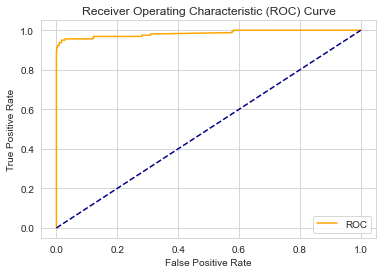

C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


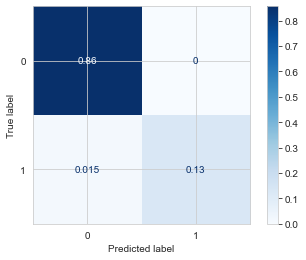

In [16]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.9399103139013453
ROC Area under Curve = 0.7958278795811518
Time taken = 0.11189389228820801
              precision    recall  f1-score   support

           0    0.93615   0.99791   0.96604       955
           1    0.97938   0.59375   0.73930       160

    accuracy                        0.93991      1115
   macro avg    0.95777   0.79583   0.85267      1115
weighted avg    0.94235   0.93991   0.93350      1115



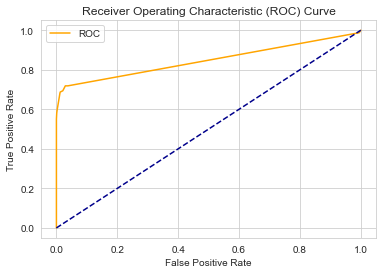

C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


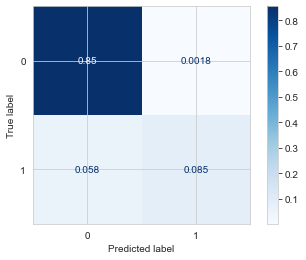

In [17]:

from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8565022421524664
ROC Area under Curve = 0.5
Time taken = 1.3471627235412598
              precision    recall  f1-score   support

           0    0.85650   1.00000   0.92271       955
           1    0.00000   0.00000   0.00000       160

    accuracy                        0.85650      1115
   macro avg    0.42825   0.50000   0.46135      1115
weighted avg    0.73360   0.85650   0.79030      1115



C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


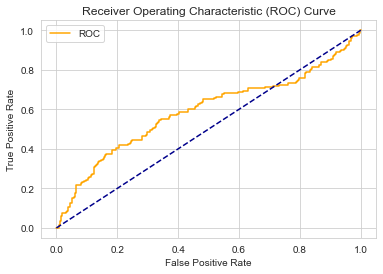

C:\Users\splpt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


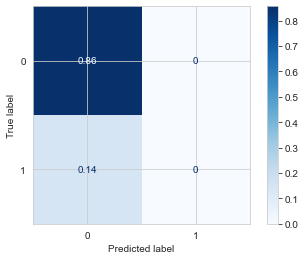

In [27]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

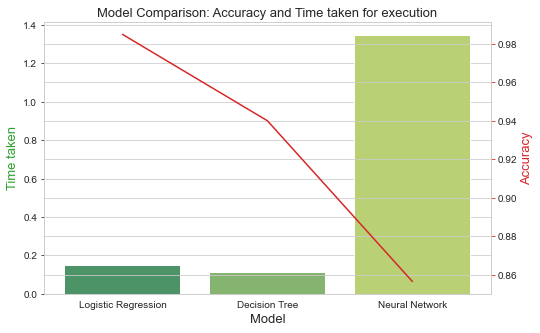

In [37]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn]
tt = [tt_lr, tt_dt, tt_nn]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sb.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sb.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

In [38]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model", "Test Accuracy Score"]
x.add_row(['Logistic Regression', round(accuracy_lr, 2)])
x.add_row(['Decision Tree', round(accuracy_dt, 2)])
x.add_row(['Neural', round(accuracy_nn, 2)])
print(x)

+---------------------+---------------------+
|        Model        | Test Accuracy Score |
+---------------------+---------------------+
| Logistic Regression |         0.98        |
|    Decision Tree    |         0.94        |
|        Neural       |         0.86        |
+---------------------+---------------------+
